# CRÉDITOS - ÁRBOLES DE DECISIÓN


**CONTENIDO**    
1- LIMPIEZA Y FORMATEO DE DATOS  
2- ANÁLISIS EXPLORATORIO DE DATOS  
3- INGENIERÍA Y SELECCIÓN DE CARACTERÍSTICAS  
4- MODELO DE APRENDIZAJE AUTOMÁTICO
5- EVALUAR EL MEJOR MODELO EN EL CONJUNTO DE PRUEBA  
7- INTERPRETAR LOS RESULTADOS DEL MODELO  
8- CONCLUSIONES 

El conjunto de datos a utilizar será el German Credit Dataset. El mismo contiene información sobre clientes que han solicitado préstamos, incluyendo varios campos con información de utilidad. El objetivo es predecir si un cliente es buen o mal pagador de préstamos, es decir, si sería seguro o no otorgarle un préstamo.
Para ello se entrenará un modelo de arbol de decisión para clasificación.

**1. LIMPIEZA Y FORMATEO DE DATOS**

IMPORTACIÓN Y PREPARACIÓN DEL DATASET

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import seaborn as sns  # seaborn para plotear 


# Datasets
# ==============================================================================


# Preprocesado y modelado
# ==============================================================================
from sklearn import model_selection
from sklearn.model_selection import train_test_split #separo datos entrenamiento
from sklearn.tree import DecisionTreeClassifier #arboles
from sklearn.preprocessing import scale #escalamiento 
from sklearn.preprocessing import minmax_scale #escalamiento
from sklearn.preprocessing import StandardScaler #escalamiento
import mglearn
from sklearn.decomposition import PCA #análisis de componentes principale

# Evaluar el modelo
# ==============================================================================
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score #area bajo la curva
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score # Para hacer cross-validation y evaluar el modelo

In [2]:
#DATASET
dataset = pd.read_csv('german_credit_data.csv', encoding = "ISO-8859-1", delimiter=',',index_col=0)

**COLUMNAS - DESCRIPCIÓN**     
Age: Edad de la persona que solicita el crédito.    
Sex: Género de la persona que solicita el crédito.    
Job: 0,1,2,3: Los valores especificados para el trabajo en forma de 0, 1, 2, 3.    
Housing: Vivienda: propia, alquilada o gratuita.    
Saving accounts: Cuentas de ahorro: la cantidad de dinero en la cuenta bancaria de la persona.     
Checking account: Cuenta corriente: cuenta de cheques.    
Credit amount: Monto del crédito.    
Duration: Duración: tiempo dado para el pago del crédito.    
Purpose: Propósito: objetivo de la solicitud de crédito.    
Risk: Riesgo: positivo o negativo.    

In [3]:
dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


**INFORMACIÓN DEL DATASET**

In [4]:
dataset.shape

(1000, 10)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


Se observan columnas con valores nulos, las mismas son de datos cualitativos.  

In [6]:
dataset.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [7]:
#Para la columna Risk se crea una nueva con valores numéricos a fin de asignar 1 para good y 0 para bad.
# Se define un diccionario de mapeo para cambiar "good" por 1 y "bad" por 0
mapeo = {"good": 1, "bad": 0}

# Se utiliza la función replace() para crear una nueva columna con valores numéricos
dataset["Risk_n"] = dataset["Risk"].replace(mapeo)

# Se imprime el conjunto de datos para verificar que se haya creado la nueva columna
print(dataset.head())

   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  Risk_n  
0         6             radio/TV  good       1  
1        48             radio/TV   bad       0  
2        12            education  good       1  
3        42  furniture/equipment  good       1  
4        24                  car   bad       0  


In [8]:
#Haremos lo mismo para la columna Housing, se crea una nueva con valores 
# numéricos a fin de asignar 0 "free" , 1 "rent" y 2 para "own".

# Se define un diccionario de mapeo
mapeo = {"free": 0, "rent": 1,"own":2}

# Se utiliza la función replace() para crear una nueva columna con valores numéricos
dataset["Housing_n"] = dataset["Housing"].replace(mapeo)

# Se imprime el conjunto de datos para verificar que se haya creado la nueva columna
print(dataset.head())

   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  Risk_n  Housing_n  
0         6             radio/TV  good       1          2  
1        48             radio/TV   bad       0          2  
2        12            education  good       1          2  
3        42  furniture/equipment  good       1          0  
4        24                  car   bad       0          0  


**2- ANÁLISIS EXPLORATORIO DE DATOS**

In [9]:
#frecuencia relativa de sucursal
dataset.groupby("Risk_n").size()

Risk_n
0    300
1    700
dtype: int64

Se aprecia que tenemos mayor cantidad de etiquetas de valor 1 o "Good". Esto podría llevar a que el modelo tenga una tendencia a predecir la clase mayoritaria e ignorar la minoritaria.

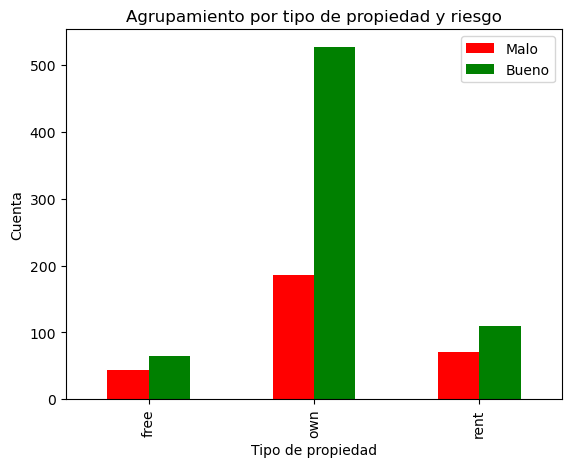

In [10]:
agrupar_housing = dataset.groupby(['Housing', 'Risk']).size().unstack()

# Graficamos los datos con un gráfico de barras no apiladas
ax = agrupar_housing.plot(kind='bar', color=['red', 'green'])

# Ajustamos el título y las etiquetas de los ejes
ax.set_title('Agrupamiento por tipo de propiedad y riesgo')
ax.set_xlabel('Tipo de propiedad')
ax.set_ylabel('Cuenta')

# Mostramos la leyenda
ax.legend(['Malo', 'Bueno'], loc='upper right')

# Mostramos el gráfico
plt.show()

Se observa mayor cantida de riesgos "Buenos" en personas que son propietarias.

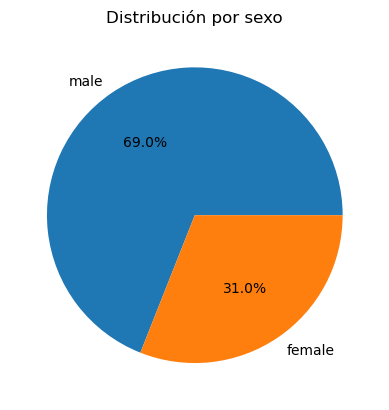

In [11]:
# Contar la cantidad de observaciones en cada etiqueta
counts = dataset['Sex'].value_counts()

# Crear un gráfico de pie
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Distribución por sexo") 

plt.show()

Se observa que en el dataset, mayor predominio de masculino entre los valores cque contiene.

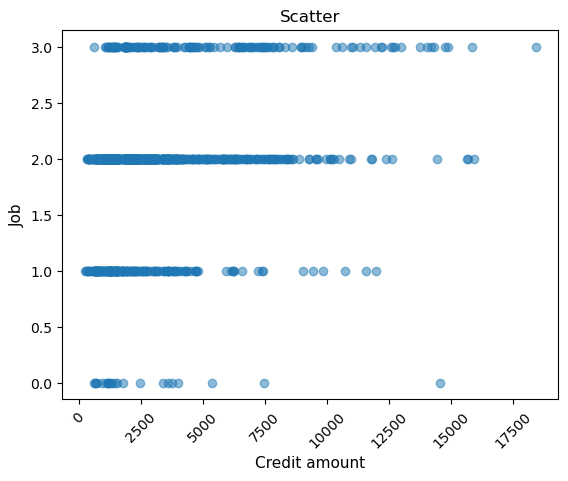

In [12]:
plt.scatter(dataset['Credit amount'],dataset['Job'],alpha=0.5)

plt.title("Scatter")                      #TITULO
plt.xlabel("Credit amount",fontsize=11)          #ETIQUETA Y
plt.ylabel("Job",fontsize=11)        #ETIQUETA X

labels = dataset['Risk_n'].unique()

plt.xticks( rotation=45)   #inclinacion de las etiquetas de eje x

#plt.xlim(0,1.2) #limite para el eje x.
#plt.ylim(0,1.5) #limite para el eje y.

#plt.legend(title='Etiquetas', labels=['0', '1'],loc='upper right') #le indico donde poner la leyenda (horizontal, vertical)
#plt.grid() #adicionar una grilla
plt.show()

In [13]:
#frecuencia relativa de sucursal
agrupar_purpose = dataset.groupby('Purpose').agg(count=('Purpose','count'), percent=('Purpose',lambda x: len(x)*100/len(dataset)))
print(agrupar_purpose)

                     count  percent
Purpose                            
business                97      9.7
car                    337     33.7
domestic appliances     12      1.2
education               59      5.9
furniture/equipment    181     18.1
radio/TV               280     28.0
repairs                 22      2.2
vacation/others         12      1.2


El principal motivo de uso de crédito está vinculado a la compra de un auto, seguido de radio/tv.

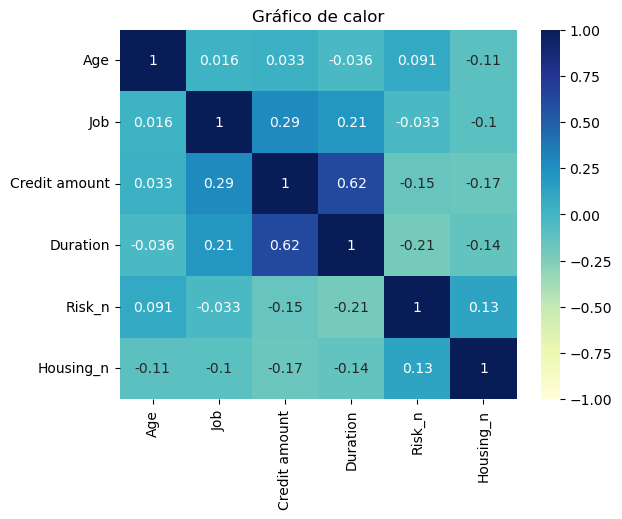

In [14]:
#graficaremos la matriz de correlación, pero observando todos los features

corr=dataset.corr()

sns.heatmap(corr,annot=True,cmap='YlGnBu',vmax=1,vmin=-1)
plt.title('Gráfico de calor')
plt.show()

Se verifica en la matriz que hay correlación de 0.62 entre Duration y Credit Amount

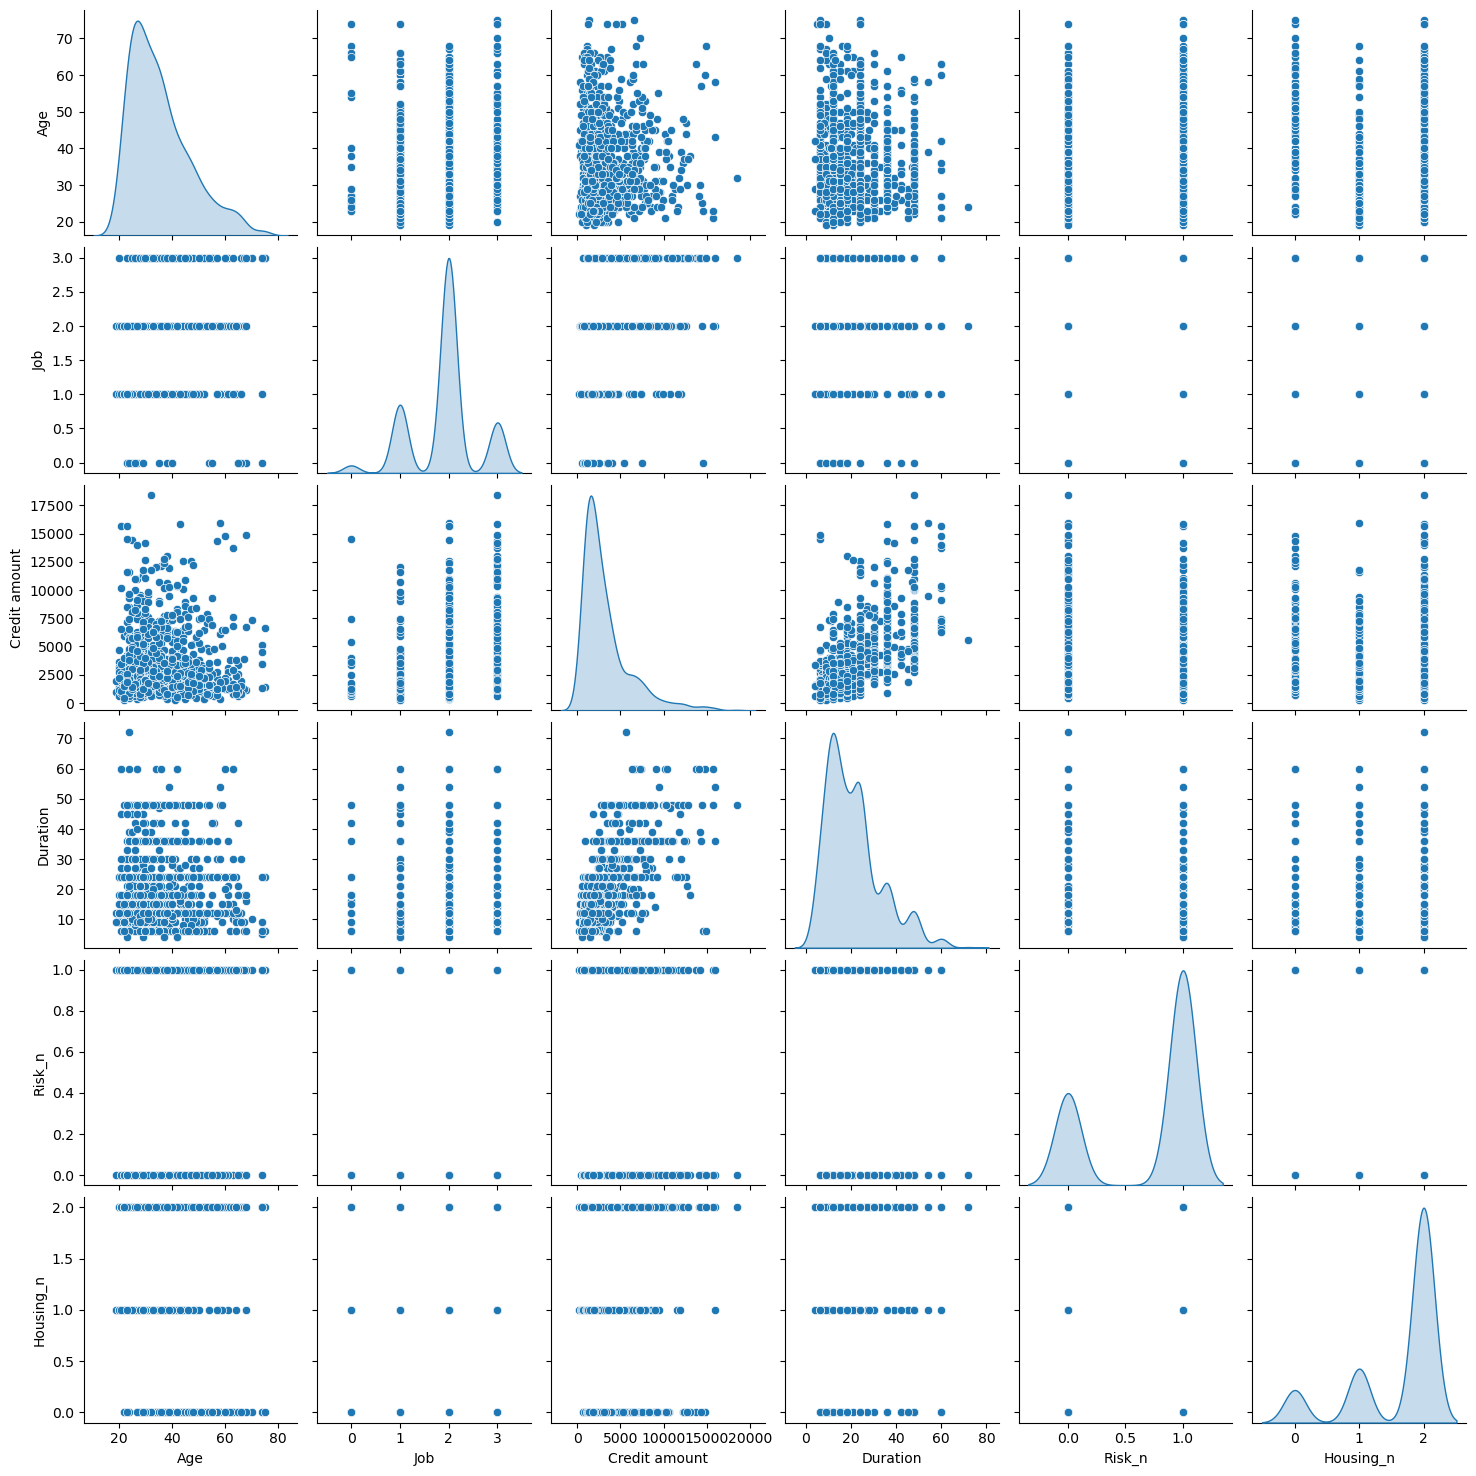

In [15]:
#graficamos todo con pairplot
sns.pairplot(dataset,diag_kind='kde',)
plt.show()

**3- INGENIERÍA Y SELECCIÓN DE CARACTERÍSTICAS** 

In [16]:
X = dataset[['Age', 'Job','Duration','Housing_n','Credit amount']]
y=dataset['Risk_n']

In [17]:
scaler = StandardScaler()
X_scal=scaler.fit_transform(X)

In [18]:
#Definimos datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_scal, y, test_size=0.2, random_state=145, shuffle=True)

**4- MODELO DE APRENDIZAJE AUTOMÁTICO**

In [19]:
arbol=DecisionTreeClassifier(max_depth=4)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [20]:
#Vamos a predecir lo que tenemos en X test
y_pred = arbol.predict(X_test)

**5- EVALUAR EL MODELO EN EL CONJUNTO DE PRUEBA**

In [21]:
score=arbol.score(X_test, y_test)
print(score)

0.71


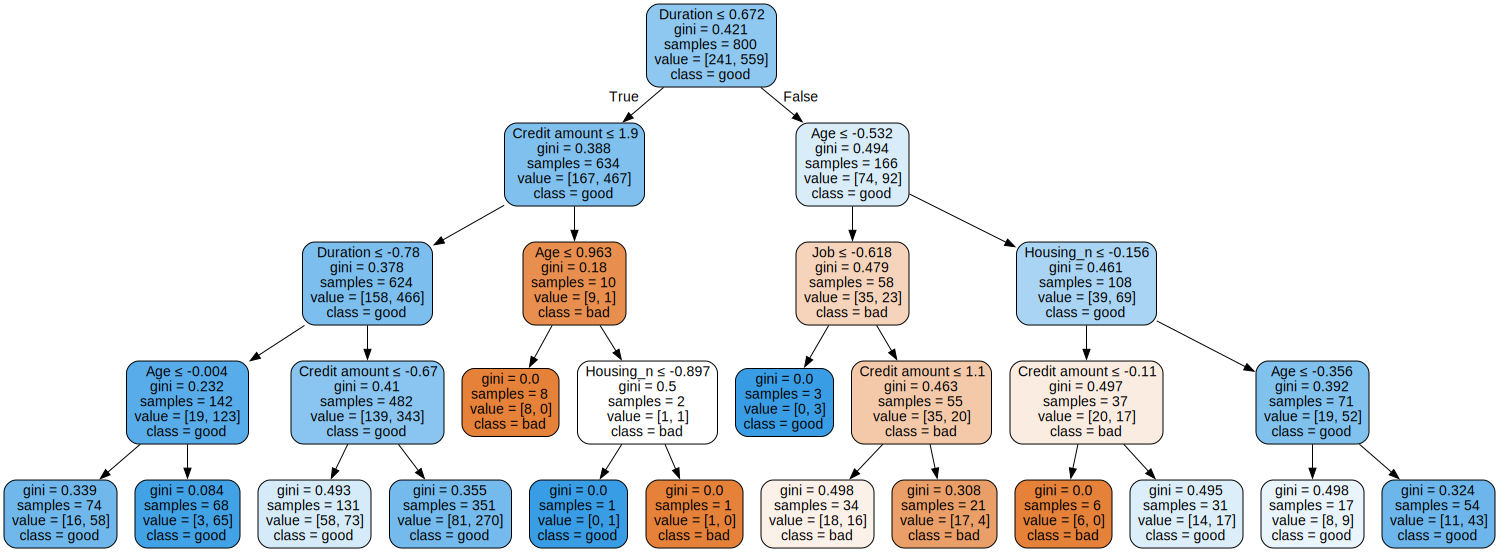

In [22]:
dot_data = export_graphviz(arbol, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['bad', 'good'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

graph = graphviz.Source(dot_data)  
graph

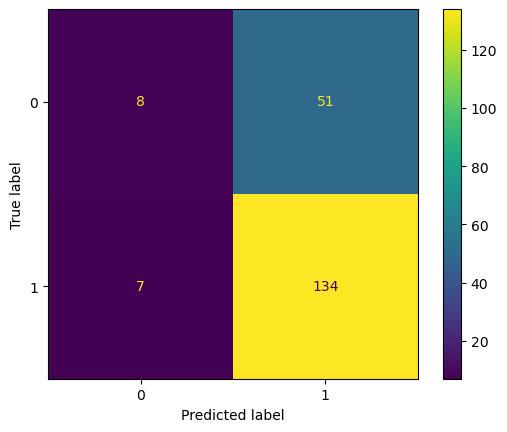

In [23]:
#matriz de confusión sobre datos iniciales
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

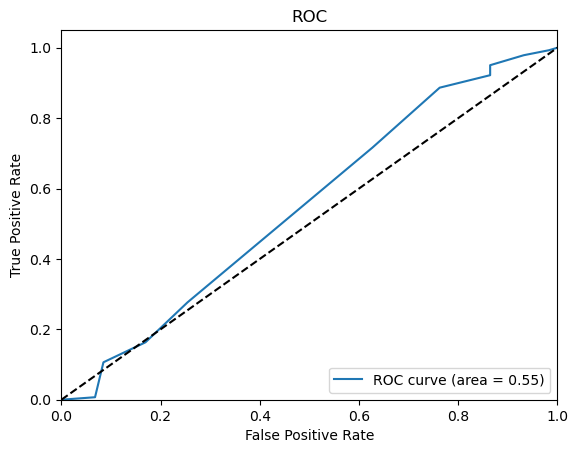

In [24]:

y_pred_proba = arbol.predict_proba(X_test)[:,1]

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

**7- INTERPRETAR LOS RESULTADOS DEL MODELO**

Se observa que el modelo ha predecido mejor respecto a la etiqueta 1 que corresponde a "Good", dado que es la que presenta mayor particpación en el dataset. La clase a predecir está desbalanceada, como vimos en el análisis inicial. 

**8- CONCLUSIONES** 

Inicialmente se configuró la profundidad del árbol en 5 obteniendo 0.68 en el score. Luego se modificó a 4 obteniendo 0.71.
Como vimos previamente, la clase a predecirt está desbalanceada, por lo cual en una próxima versión se trabajará ese aspecto con el fin de balancear la misma con algún método y probar nuevamente el modelo. 

**FUENTE DATASET**

Versión modificada de la que se cita debajo. Se obtuvo en Kaggle.

Dua, D. y Graff, C. (2019). Repositorio de aprendizaje automático de UCI [http://archive.ics.uci.edu/ml]. Irvine, CA: Universidad de California, Escuela de Informática y Ciencias de la Computación.